<h1>Citibike Network Assignment</h1>
<li>The file, 201809-citibike-tripdata.csv, contains citibike trip data from September 2018 (a reasonable sized file!)
<li>The data:<br>
"tripduration","starttime","stoptime","start station id","start station name","start station latitude","start station longitude","end station id","end station name","end station latitude","end station longitude","bikeid","usertype","birth year","gender"
<li>Each record in the data is a trip 
<li>The data is described at https://www.citibikenyc.com/system-data

<h1>STEP 1: Read the data into a dataframe</h1>
<li>Convert station ids to str if necessary

In [11]:
import pandas as pd
import numpy as np
datafile = "201801-citibike-tripdata.csv"
df = pd.read_csv(datafile)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718994 entries, 0 to 718993
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             718994 non-null  int64  
 1   starttime                718994 non-null  object 
 2   stoptime                 718994 non-null  object 
 3   start station id         718994 non-null  int64  
 4   start station name       718994 non-null  object 
 5   start station latitude   718994 non-null  float64
 6   start station longitude  718994 non-null  float64
 7   end station id           718994 non-null  int64  
 8   end station name         718994 non-null  object 
 9   end station latitude     718994 non-null  float64
 10  end station longitude    718994 non-null  float64
 11  bikeid                   718994 non-null  int64  
 12  usertype                 718994 non-null  object 
 13  birth year               718994 non-null  int64  
 14  gend

In [41]:
df.head()

tripduration                 starttime                  stoptime  \
0           970  2018-01-01 13:50:57.4340  2018-01-01 14:07:08.1860   
1           723  2018-01-01 15:33:30.1820  2018-01-01 15:45:33.3410   
2           496  2018-01-01 15:39:18.3370  2018-01-01 15:47:35.1720   
3           306  2018-01-01 15:40:13.3720  2018-01-01 15:45:20.1910   
4           306  2018-01-01 18:14:51.5680  2018-01-01 18:19:57.6420   

  start station id start station name  start station latitude  \
0               72   W 52 St & 11 Ave               40.767272   
1               72   W 52 St & 11 Ave               40.767272   
2               72   W 52 St & 11 Ave               40.767272   
3               72   W 52 St & 11 Ave               40.767272   
4               72   W 52 St & 11 Ave               40.767272   

   start station longitude end station id         end station name  \
0               -73.993929            505          6 Ave & W 33 St   
1               -73.993929           3255          8 Ave & W 31 St   
2               -73.993929            525         W 34 St & 11 Ave   
3               -73.993929            447          8 Ave & W 52 St   
4               -73.993929           3356  Amsterdam Ave & W 66 St   

   end station latitude  end station longitude  bikeid    usertype  \
0             40.749013             -73.988484   31956  Subscriber   
1             40.750585             -73.994685   32536  Subscriber   
2             40.755942             -74.002116   16069  Subscriber   
3             40.763707             -73.985162   31781  Subscriber   
4             40.774667             -73.984706   30319  Subscriber   

   birth year  gender  
0        1992       1  
1        1969       1  
2        1956       1  
3        1974       1  
4        1992       1

<h1>STEP 2: Basic cleaning</h1>
<li>Remove data that have any nans in any row (none in this file but others do have nans)
<li>and convert stationids to str 

In [12]:
df.dropna(axis=0,inplace=True)
df['end station id']=df['end station id'].astype(str)
df['start station id']=df['start station id'].astype(str)

<h1>STEP 3: Write a function that returns a graph given a citibike data frame</h1> 
<li>Your function should return two things:
<ol>
<li>a graph
<li>a dictionary with station ids as the key and station name as the value
</ol>
<li>The graph should contain 
<ol>
<li>nodes (station ids)
<li>edges (station id, station id)
<li>edge data 
<ol>
<li>count: number of trips on the edge
<li>time: average duration - pickup to dropoff - on that edge
</ol>
</ol>
<li><b>Note:</b> the edge (x1,y1) is the same as (y1,x1) even though the start station ids and end station ids are flipped in the dataframe

In [3]:
def get_citibike_graph(df):
    import networkx as nx
    G = nx.Graph()
    node_names = dict()

    #YOUR CODE GOES HERE'
    df1= df[['start station id','end station id','tripduration']]
    start_list = df1['start station id'].values.tolist()
    end_list = df1['end station id'].values.tolist()
    #create list of nodes
    nodes = []
    for i in start_list:
        if i not in nodes:
            nodes.append(i)
    for m in end_list:
        if m not in nodes:
            nodes.append(m)
    #create list of edges
    edges=[tuple(row) for row in df1.values]

    for e in edges:
        G.add_edge(e[0],e[1],duration=e[2])

    pos=nx.spring_layout(G) # positions for all nodes

    # nodes
    nx.draw_networkx_nodes(G,pos,
                       node_color='r',
                       node_size=500,
                      alpha=0.8)

    # edges
    #nx.draw_networkx_edges(sub_graph,pos,width=1.0,alpha=0.5)
    nx.draw_networkx_edges(G,pos,
                       edgelist=G.edges(),
                       width=8,alpha=0.5,edge_color='b')

    node_name={}
    for node in G.nodes():
        node_name[node]=str(node)

    nx.draw_networkx_edge_labels(G,pos,font_size=10)
    node_name={}
    for node in G.nodes():
        node_name[node]=str(node)

    nx.draw_networkx_labels(G,pos,node_name,font_size=16)

    plt.axis('off')
    plt.show() # display
    
    #append value to node_names dict
    for node in G.nodes(): 
        node_names[node]=df.loc[df['start station id'] == node, 'start station name']
        node_names[node]=df.loc[df['end station id'] == node, 'end station name']
   
    return G,node_names
    

In [49]:
node_names = dict()
for node in G.nodes(): 
    node_names[node]=df['start station name'][df['start station id']== node].values
    node_names[node]=df['end station name'][df['end station id']== node].values

In [43]:
node_names

{'72': array(['W 52 St & 11 Ave', 'W 52 St & 11 Ave', 'W 52 St & 11 Ave', ...,
        'W 52 St & 11 Ave', 'W 52 St & 11 Ave', 'W 52 St & 11 Ave'],
       dtype=object),
 '505': array(['6 Ave & W 33 St', '6 Ave & W 33 St', '6 Ave & W 33 St', ...,
        '6 Ave & W 33 St', '6 Ave & W 33 St', '6 Ave & W 33 St'],
       dtype=object),
 '3255': array(['8 Ave & W 31 St', '8 Ave & W 31 St', '8 Ave & W 31 St', ...,
        '8 Ave & W 31 St', '8 Ave & W 31 St', '8 Ave & W 31 St'],
       dtype=object),
 '525': array(['W 34 St & 11 Ave', 'W 34 St & 11 Ave', 'W 34 St & 11 Ave', ...,
        'W 34 St & 11 Ave', 'W 34 St & 11 Ave', 'W 34 St & 11 Ave'],
       dtype=object),
 '447': array(['8 Ave & W 52 St', '8 Ave & W 52 St', '8 Ave & W 52 St', ...,
        '8 Ave & W 52 St', '8 Ave & W 52 St', '8 Ave & W 52 St'],
       dtype=object),
 '3356': array(['Amsterdam Ave & W 66 St', 'Amsterdam Ave & W 66 St',
        'Amsterdam Ave & W 66 St', 'Amsterdam Ave & W 66 St',
        'Amsterdam Ave & W 66 S

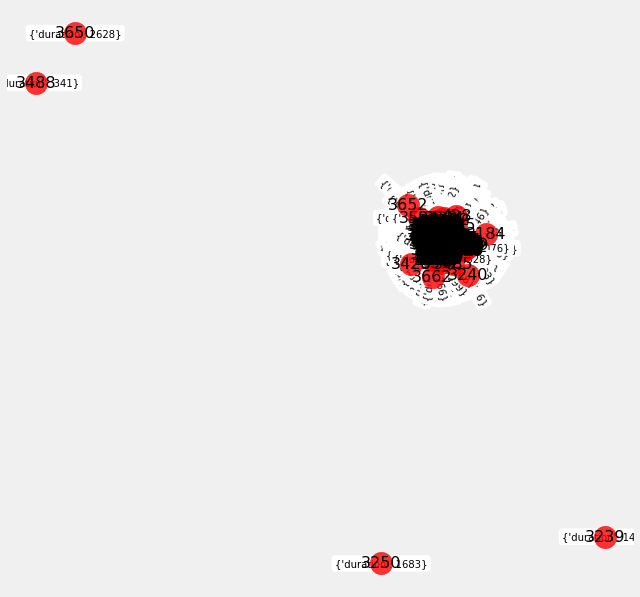

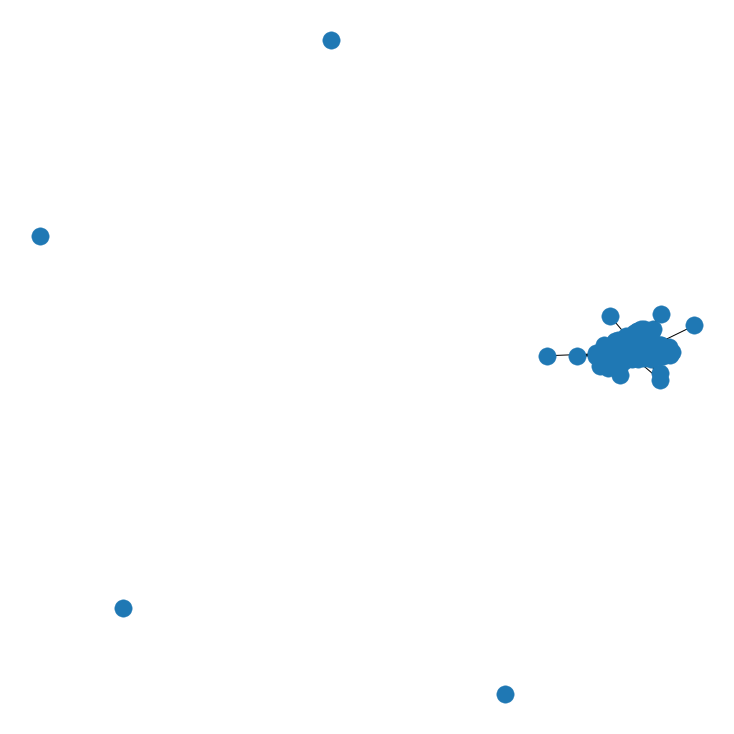

In [36]:
import networkx as nx
G = nx.Graph()

df1= df[['start station id','end station id','tripduration']]
start_list = df1['start station id'].values.tolist()
end_list = df1['end station id'].values.tolist()
#create list of nodes
nodes = []
for i in start_list:
    if i not in nodes:
        nodes.append(i)
for m in end_list:
    if m not in nodes:
        nodes.append(m)
#create list of edges
edges=[tuple(row) for row in df1.values]

for e in edges:
    G.add_edge(e[0],e[1],duration=e[2])

pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,
                       node_color='r',
                       node_size=500,
                      alpha=0.8)

# edges
#nx.draw_networkx_edges(sub_graph,pos,width=1.0,alpha=0.5)
nx.draw_networkx_edges(G,pos,
                       edgelist=G.edges(),
                       width=8,alpha=0.5,edge_color='b')

node_name={}
for node in G.nodes():
    node_name[node]=str(node)

nx.draw_networkx_edge_labels(G,pos,font_size=10)
node_name={}
for node in G.nodes():
    node_name[node]=str(node)

nx.draw_networkx_labels(G,pos,node_name,font_size=16)

plt.axis('off')
plt.show() # display

<h1>STEP 4: Create the following graphs using the function above</h1>
<li>G: A graph of all the data in the dataframe
<li>m_G: A graph containing only data from male riders
<li>f_G: A graph containing only data from female riders
<li>Note: for m_G and f_G you will need to extract data from the dataframe

In [4]:
G,nodes=get_citibike_graph(df)

<h1>STEP 5: Answer the following questions for each of the graphs</h1>
<ol>
<li>Which station (name) is the best connected (max degree)?
<li>Travel between which pair of stations is the longest in terms of average duration between bike pickups and dropoffs. Report both the two stations as well as the time in minutes
<li>Which edge is associated with the most number of trips?
<li>Which station is the most central?
<li>Which node is a bottleneck node?

Which station (name) has the greatest number of connections (max degree)?

Busiest female station E 17 St & Broadway
Busiest male station Lawrence St & Willoughby St
Busiest station Lawrence St & Willoughby St


Travel between which pair of stations is the longest in terms of average duration between bike pickups and dropoffs

In [10]:
#Note: I've printed the max edges but you don't need to print them

Longest average distance males:  W 43 St & 6 Ave  to  Warren St & Church St . Minutes:  6640
Longest average distance females:  S Portland Ave & Hanson Pl  to  Flushing Ave & Carlton Ave . Minutes:  9093
Longest average distance all:  Flushing Ave & Carlton Ave  to  S Portland Ave & Hanson Pl . Minutes:  9093
('524', '152', {'trips': 5, 'time': 398427.4})
('353', '242', {'trips': 1, 'time': 545583.0})
('242', '353', {'trips': 1, 'time': 545583.0})


Which edge is associated with the most number of trips?

most trip route males:  E 43 St & Vanderbilt Ave  to  W 41 St & 8 Ave . Minutes:  7
most trip route females:  Lafayette St & E 8 St  to  E 7 St & Avenue A . Minutes:  5
most trip route all:  E 43 St & Vanderbilt Ave  to  W 41 St & 8 Ave . Minutes:  7


<h2>Centrality</h2>
One of the concerns that the citibike system has to deal with is ensuring that no station has empty slots (a bike should always be available) and that no station should have no empty slots (you should be able to return a bike). To do this, it needs to monitor the movement of bikes through the system, ideally using a directed graph. Though our graph is not directed, we can look at some network characteristics that will help us answer these questions. Note that the "trips" feature in edge data captures flows.
<li>Which node is a possible bottleneck node in terms of bike flows?
<li>Which node is the "nearest" to all other nodes (irrespective of flows)
<li>Which node is the "nearest" to all other nodes (in terms of distance = time)


Most central in connectivity Lawrence St & Willoughby St
Most central in connectivity using time as distance Fulton St & Rockwell Pl
Bottleneck node Atlantic Ave & Fort Greene Pl
